# Experiment Cluster Metrics

The 50 Pandas Dataframes below capture the following metrics for each of the 50 lattice machines in the cluster in the duration on the experiment:

- Timestamp
- CPU Usage: User Percent
- CPU Usage: System Percent
- Memory Total
- Memory Active
- Memory Inactive
- Network: eno1 Writes in KB/s
- Network: eno1 Reads in KB/s
- Network: eno2 Writes in KB/s
- Network: eno2 Reads in KB/s
- Disk Reads: sda
- Disk Reads: sdb
- Disk Reads: sdc
- Disk Reads: sdd
- Disk Writes: sda
- Disk Writes: sdb
- Disk Writes: sdc
- Disk Writes: sdd

In [66]:
# NOTEBOOK VARIABLES

experiment = "tl-sequential"
cluster_metric = "CPU_ALL:User%" # See dataframe for column titles

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [68]:
def hostname_to_ip(machine_name):
    parts = machine_name.split("-")
    if parts[0] == "lattice":
        number = int(parts[1])
        base = number + 10 # starts at lattice-100 : 129.82.208.110
        return "129.82.208." + str(base)
    else:
        print("Invalid hostname: ", machine_name)
        return None
        

In [69]:
dir_prefix = f"experiment_data/cluster_metrics/{experiment}"
machines_files = [(f"lattice-{i}", str(i-100)+"-"+hostname_to_ip(f"lattice-{i}")+".nmon.csv") for i in range(100, 150)]
machines_dfs = {}
for machine_entry in machines_files:
    machines_dfs[machine_entry[0]] = pd.read_csv(f"{dir_prefix}/{machine_entry[1]}", header=0)
    
machines_dfs["lattice-100"]

,timestamp,CPU_ALL:User%,CPU_ALL:Sys%,MEM:memtotal,MEM:active,MEM:inactive,NET:eno1-write-KB/s,NET:eno1-read-KB/s,NET:eno2-write-KB/s,NET:eno2-read-KB/s,DISKREAD:sda,DISKREAD:sdb,DISKREAD:sdc,DISKREAD:sdd,DISKWRITE:sda,DISKWRITE:sdb,DISKWRITE:sdc,DISKWRITE:sdd
0,1621426935,10.7,5.1,31828.8,10869.5,4872.4,167.3,152.5,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0
1,1621426936,1.3,1.7,31828.8,10867.9,4872.4,10.4,13.2,0.0,0.0,0.0,0.0,0.0,0.0,27.9,0.0,0.0,0.0
2,1621426937,1.2,1.6,31828.8,10868.1,4872.4,67.1,21.6,0.0,0.0,0.0,0.0,0.0,0.0,167.6,0.0,0.0,0.0
3,1621426938,4.1,3.5,31828.8,10881.8,4872.4,56.2,70.0,0.0,0.0,0.0,0.0,0.0,0.0,207.6,0.0,0.0,0.0
4,1621426939,7.6,3.9,31828.8,10913.2,4872.5,83.5,36.7,0.0,0.0,0.0,0.0,0.0,0.0,303.3,0.0,23.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,1621435223,3.1,2.8,31828.8,11239.0,4871.6,69.4,20.2,0.0,0.0,0.0,0.0,0.0,0.0,59.9,0.0,8.0,0.0
8146,1621435224,2.0,2.1,31828.8,11239.3,4871.6,12.4,15.9,0.0,0.0,0.0,0.0,0.0,0.0,154.8,0.0,11.9,0.0
8147,1621435225,4.1,2.7,31828.8,11238.6,4871.6,68.6,33.3,0.0,0.0,0.0,0.0,0.0,0.0,315.3,0.0,0.0,0.0
8148,1621435226,1.7,1.9,31828.8,11238.7,4871.6,20.7,19.5,0.0,0.0,0.0,0.0,0.0,0.0,191.6,0.0,0.0,0.0


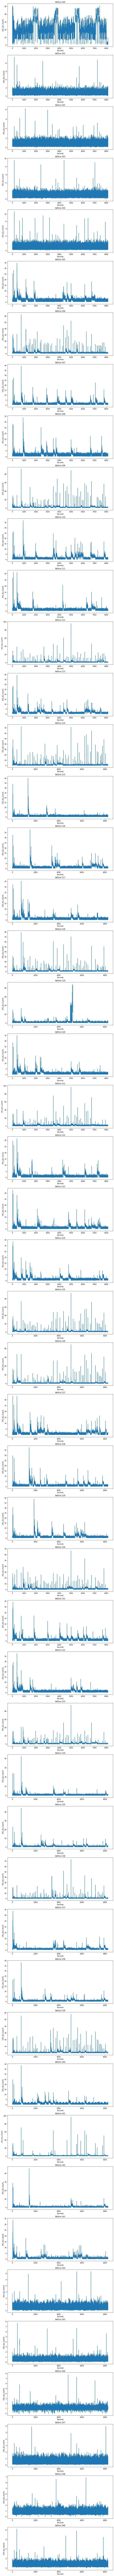

In [70]:
# ---- NMON Profiling ----

# Create a figure
figure, axis = plt.subplots(len(machines_dfs), 1, figsize=(12,300))

for i, hostname in enumerate(machines_dfs.keys()):
    df = machines_dfs[hostname]
    data_list = df[cluster_metric].to_list()
    axis[i].plot(data_list)
    axis[i].set_xlabel("Seconds")
    axis[i].set_ylabel(cluster_metric)
    axis[i].set_title(hostname)


# show plot
plt.show()